### **1. Importing the required packages**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

### **2. Reading and Exploring the Data**

In [ ]:
customers = pd.read_csv('Mall_Customers.csv')

In [ ]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
customers.drop(columns = 'CustomerID', inplace = True)

In [ ]:
customers.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
customers.isnull().sum()

,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
customers.dtypes

,0
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [ ]:
customers.duplicated().sum()

np.int64(0)

In [ ]:
customers.drop_duplicates(inplace = True)

##### **Encoding the Gender column**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
customers['Gender'] = le.fit_transform(customers['Gender'])

### **Machine Learning Process**

In [ ]:
customers.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [ ]:
X = customers.iloc[:, 2:4].values  #.values converts a dataframe into an array

In [ ]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

#### **WCSS Process for finding the optimal k-value**

In [ ]:
wcss = []

for k in range(1,12):
  kmeans = KMeans(n_clusters = k, init = "k-means++")
  kmeans.fit(X) #clustering process starts here

  print(kmeans.inertia_) #.inertia_ stores the wcss values for each k
  wcss.append(kmeans.inertia_)

269981.28000000014
183653.3289473683
106348.37306211119
73679.78903948837
44448.45544793369
37239.83554245604
32278.293453087783
25321.07729345122
21900.34135010752
19704.123543147773
18293.254966136014


#### **Plot the graph between k-value and wcss**

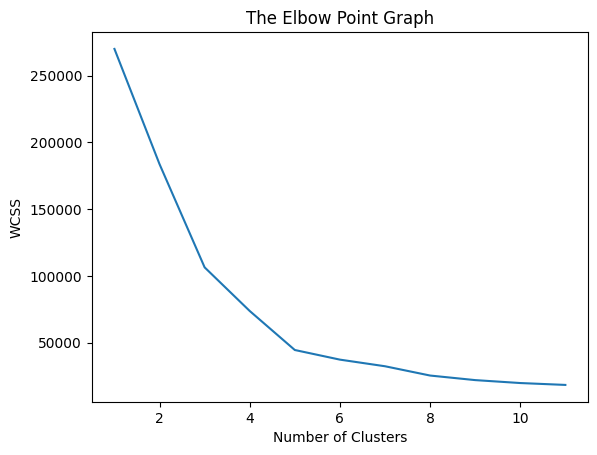

In [ ]:
plt.plot(range(1,12), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

#### **Apply KMeans Clustering on the data**

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++')
kmeans.fit(X) #here we start the clustering process where data will be divided into 5 clusters

KMeans(n_clusters=5)

In [ ]:
y = kmeans.predict(X) #it will tell us in which cluster which datapoint has been put

In [ ]:
y

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [ ]:
output = pd.DataFrame(y, columns = ['Cluster Number'])

In [ ]:
final_df = pd.concat([customers, output], axis = 1)

In [ ]:
final_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster Number
0,1,19,15,39,3
1,1,21,15,81,0
2,0,20,16,6,3
3,0,23,16,77,0
4,0,31,17,40,3


### Visualize the clusters

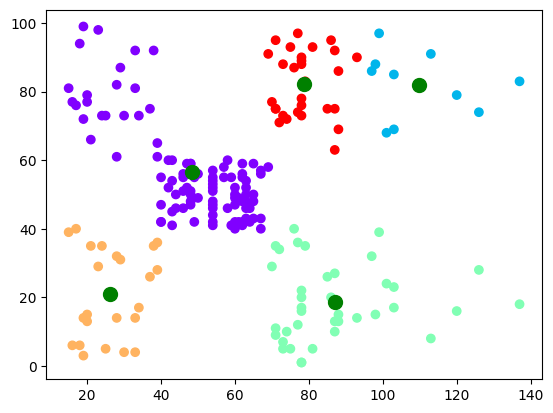

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = 'rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'green')
plt.show()